In [70]:
from netCDF4 import Dataset
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd

In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "epc100"
print(variable)
model = "CMCC-ESM2"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)

epc100
CMCC-ESM2
ssp585
Omon


## Interpolation


In [5]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

epc100_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc


epc100_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc


In [6]:
!cdo remapdis,r360x180 Data/Raw/epc100_Omon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65262)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [9.47s 206MB].


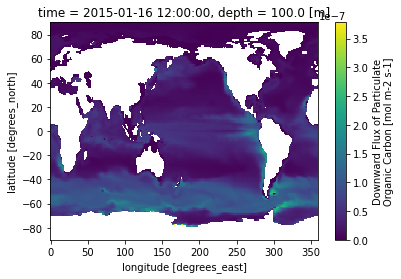

In [7]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [16]:
!cdo -sethalo,0,1 Data/{variable}_{model}_{experiment}_incomplete.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo    sethalo: Processed 1 variable over 1032 timesteps [3.44s 248MB].


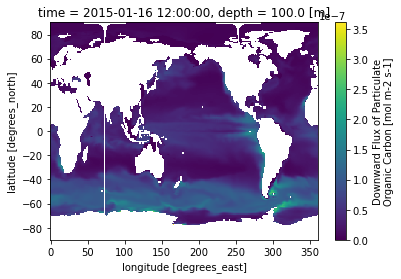

In [17]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [5]:
!cdo remapdis,r360x180 Data/Raw/epc100_Omon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo    remapdis: Distance-weighted average weights from curvilinear (362x292) to lonlat (360x180) grid, with source mask (65262)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1980 timesteps [18.50s 205MB].


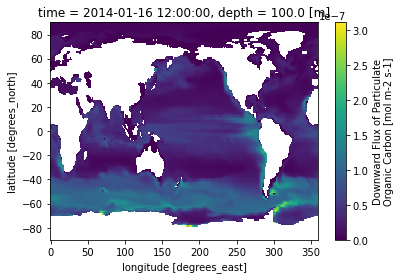

In [6]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

In [21]:
!cdo -sethalo,0,1 Data/{variable}_historical_incomplete.nc Data/{variable}_historical_remapped.nc

cdo    sethalo: Processed 1 variable over 1980 timesteps [17.07s 233MB].


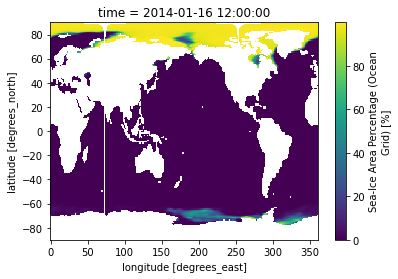

In [69]:
nc = xarray.open_dataset("Data/{}_historical_remapped.nc".format(variable))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

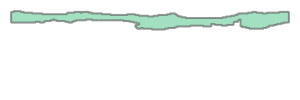

In [14]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [15]:
ice = gpd.GeoSeries(shape['geometry'][0])

##### ssp585

In [9]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:59:21 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/394a186a-ad1c-409c-ab43-00e07f9964e4
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [10]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth        float64 100.0
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:59:21 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/394a186a-ad1c-409c-ab43-00e07f9964e4
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [11]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

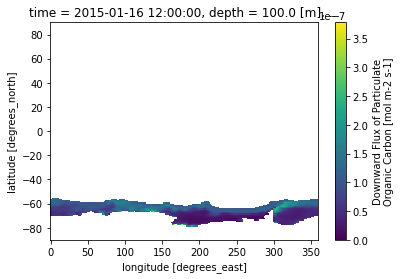

In [12]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [13]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### historical


In [16]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 15:03:11 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/4bb855e7-2830-41dc-b228-4ef578048d18
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [17]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth        float64 100.0
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 15:03:11 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/4bb855e7-2830-41dc-b228-4ef578048d18
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [18]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

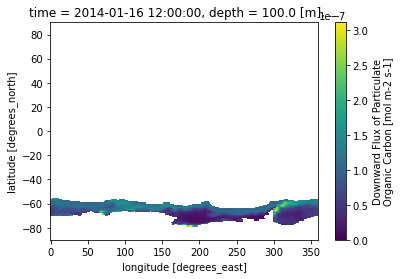

In [19]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [20]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## Cropping by export

#### Calculate percentage difference 

##### historical

In [40]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    depth        float64 ...
Data variables:
    spatial_ref  int64 ...
    epc100       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 15:03:11 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/4bb855e7-2830-41dc-b228-4ef578048d18
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [41]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 1995-01-16 12:00:00 ... 2014-12-16 12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 15:03:11 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/4bb855e7-2830-41dc-b228-4ef578048d18
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [43]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

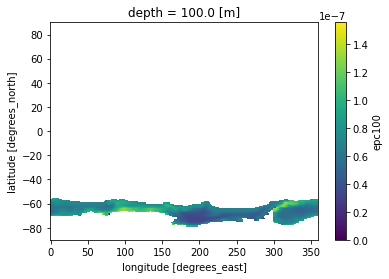

In [44]:
historical_mean[variable].plot()

In [46]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

##### ssp585

In [60]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    depth        float64 ...
Data variables:
    spatial_ref  int64 ...
    epc100       (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:59:21 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/394a186a-ad1c-409c-ab43-00e07f9964e4
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [61]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2081-01-16 12:00:00 ... 2100-12-16 12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:59:21 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/394a186a-ad1c-409c-ab43-00e07f9964e4
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [62]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

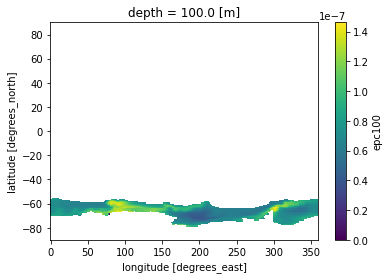

In [63]:
new_mean[variable].plot()

In [64]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Difference calculation

In [6]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

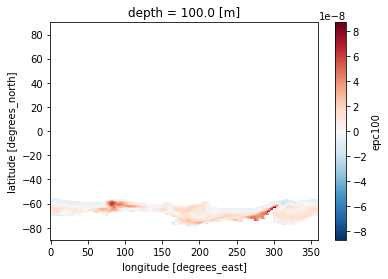

In [7]:
difference = new - historical
difference[variable].plot()
difference

In [8]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [10]:
difference.max()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    depth    float64 100.0
Data variables:
    epc100   float64 8.698e-08

In [11]:
difference.min()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    depth    float64 100.0
Data variables:
    epc100   float64 -2.04e-08

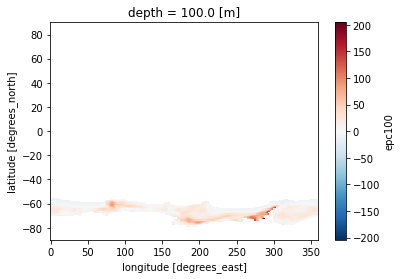

In [12]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [13]:
percentage

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [14]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Select regions 

##### Increasing

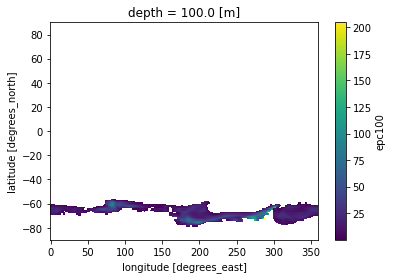

In [17]:
new = percentage.where(percentage > 0)
new[variable].plot()

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    inc      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

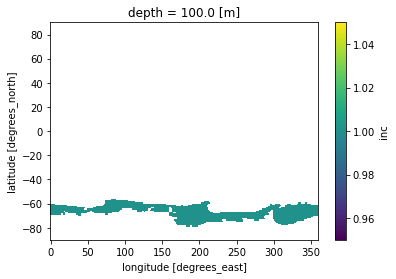

In [18]:
new1  = new.assign(inc = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new1['inc'].plot()
new1

In [78]:
new1 = new1.drop_vars(variable)
new1.to_netcdf(path = "Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Decreasing

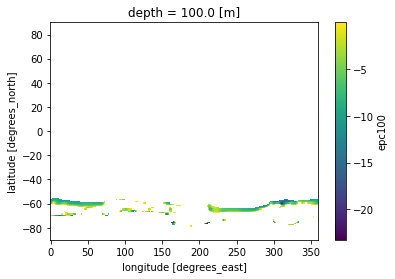

In [21]:
new2 = percentage.where(percentage < 0)
new2[variable].plot()

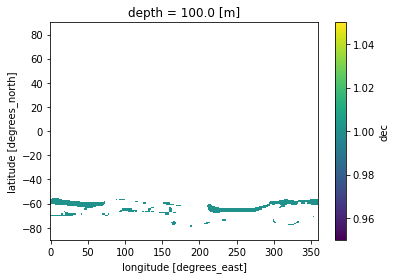

In [22]:
new3  = new2.assign(dec = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new3['dec'].plot()

In [42]:
new3

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    depth    float64 100.0
Data variables:
    dec      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [23]:
new3 = new3.drop_vars(variable)
new3.to_netcdf(path = "Data/Shape/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Summary values

In [49]:
inc_area = (new1.count()/percentage.count()*100)[variable].values
dec_area = (new2.count()/percentage.count()*100)[variable].values

mean = (percentage.mean())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n Inc area = {}\n Dec area = {}".format(mean, mean_abs, 
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs,
                                                                                                          inc_area, dec_area))

Mean change = 14.881857872009277% 8.507245574662647e-09
 Max inc = 204.50167846679688% 8.697956133119078e-08
 Max dec = -23.27392578125% -2.040298596739376e-08
 Inc area = 75.01110617503332
 Dec area = 24.98889382496668


#### Make mask


In [18]:
shape = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
shape

,FID,geometry
0,0,"POLYGON ((81.500 -56.000, 87.500 -56.000, 87.5..."


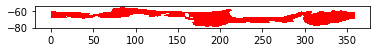

In [22]:
polygons1 = []

for i, row in shape.iterrows():
    poly = shape['geometry'][i]
    polygons1.append(poly)
    
boundary_inc = gpd.GeoSeries(ops.unary_union(polygons1))
boundary_inc.plot(color = 'red')
plt.show()

In [23]:
boundary_inc.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_inc.shp".format(model))

In [27]:
shape1 = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")
shape1

,FID,geometry
0,0,"MULTIPOLYGON (((190.500 -78.000, 190.500 -79.0..."


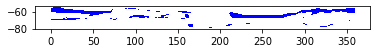

In [25]:
polygons2 = []

for i, row in shape1.iterrows():
    poly = shape1['geometry'][i]
    polygons2.append(poly)
    
boundary_dec = gpd.GeoSeries(ops.unary_union(polygons2))
boundary_dec.plot(color = 'blue')
plt.show()

In [26]:
boundary_dec.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_dec.shp".format(model))

#### Plot of masks

In [77]:
ice = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

-6378073.21863


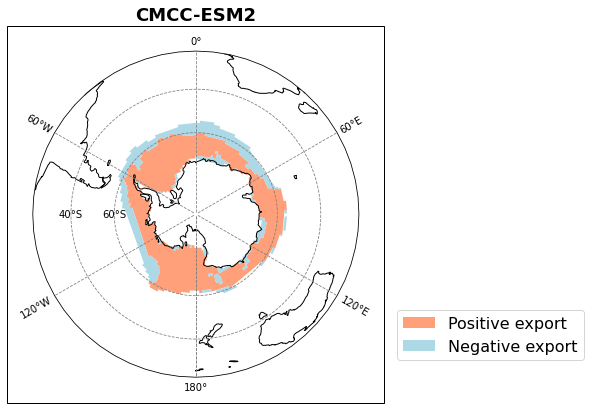

In [167]:
fig = plt.figure(figsize=[8,6])

ax = fig.add_subplot(1,1,1,
                     projection = cartopy.crs.Orthographic(central_longitude = 0, 
                                                           central_latitude=-90))


plt.title("{}".format(model),
         fontsize = 18, fontweight="bold",
          pad = 16, loc = "center")

gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--',
                  y_inline = True) 

gl.ylabel_style = {'size': 10}
gl.xlabel_style = {'size': 10}

gl.ylocator = mticker.FixedLocator([-60, -40])

plt.draw()
for ea in gl.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])
            
            
ax.add_geometries(inc['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightsalmon', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.add_geometries(dec['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightblue', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.coastlines()
ax.set_global()  

autoAxis = ax.axis()
print(autoAxis[0])
rec = plt.Rectangle((autoAxis[0]-1000000,autoAxis[2]-1000000),(autoAxis[1]-autoAxis[0])+2000000,(autoAxis[3]-autoAxis[2])+2000000,fill=False,lw=1)
rec = ax.add_patch(rec)
rec.set_clip_on(False)


inc_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightsalmon")
dec_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightblue")
labels = ['Positive export',
          'Negative export']

fig.legend([inc_label, dec_label], labels,
            bbox_to_anchor=(1.2, 0.3),
           fancybox=True, prop={'size': 16})



plt.savefig("output/CMCC-ESM2/{}_mask_regions.png".format(model), bbox_inches='tight')

plt.show()

#### Apply mask

In [169]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

##### Increasing

In [170]:
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:59:21 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/394a186a-ad1c-409c-ab43-00e07f9964e4
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

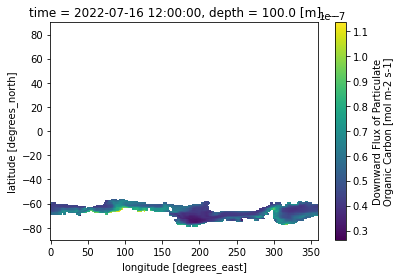

In [171]:
plotting = inc_area.sel(time = "2022-07")
plotting[variable].plot()

In [173]:
vars_list = list(inc_area.data_vars)  
for var in vars_list:  
    del inc_area[var].attrs['grid_mapping']


inc_area.to_netcdf(path = "Data/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Decreasing

In [174]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 01 14:59:21 2022: cdo remapdis,r360x180 D...
    source:                 CMCC-ESM2 (2017): \naerosol: MAM3\natmos: CAM5.3 ...
    institution:            Fondazione Centro Euro-Mediterraneo sui Cambiamen...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            epc100
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/394a186a-ad1c-409c-ab43-00e07f9964e4
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

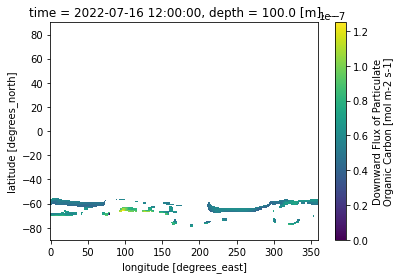

In [175]:
plotting = dec_area.sel(time = "2022-07")
plotting[variable].plot()

In [176]:
vars_list = list(dec_area.data_vars)  
for var in vars_list:  
    del dec_area[var].attrs['grid_mapping']


dec_area.to_netcdf(path = "Data/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Absolute map

### Percentage Change map

### Mean regression 

### Sum regression

#### Calcualtion

##### Increasing zone

In [14]:
inc_spatial_mean = inc.groupby("time").mean(["lat", "lon"])
inc_spatial_mean

<xarray.Dataset>
Dimensions:      (time: 1032)
Coordinates:
  * time         (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:0...
    spatial_ref  int64 0
Data variables:
    epc100       (time) float32 9.644e-08 5.883e-08 ... 5.953e-08 1.16e-07

In [15]:
inc_year_mean = inc_spatial_mean.groupby("time.year").mean("time")
inc_year_mean

<xarray.Dataset>
Dimensions:      (year: 86)
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
Data variables:
    epc100       (year) float32 2.334e-08 2.458e-08 ... 3.174e-08 3.178e-08

In [17]:
inc_mean = inc_year_mean[variable][:]
inc_mean

<xarray.DataArray 'epc100' (year: 86)>
array([2.3336653e-08, 2.4583903e-08, 2.2739057e-08, 2.4661636e-08,
       2.2547644e-08, 2.4504059e-08, 2.3043407e-08, 2.7595169e-08,
       2.2732614e-08, 2.5346340e-08, 2.5925237e-08, 2.5979332e-08,
       2.4797224e-08, 2.7781679e-08, 2.6598315e-08, 2.4696035e-08,
       2.7598682e-08, 2.3854389e-08, 2.5981961e-08, 2.6470408e-08,
       2.6705523e-08, 2.5871223e-08, 2.4667699e-08, 2.4764111e-08,
       2.5420698e-08, 2.7655092e-08, 2.9141622e-08, 2.8194755e-08,
       2.6424560e-08, 2.6646342e-08, 2.8547836e-08, 2.7340546e-08,
       2.7053309e-08, 2.7823800e-08, 2.6493639e-08, 2.7458347e-08,
       2.6213257e-08, 2.8376661e-08, 2.8975039e-08, 2.8189568e-08,
       2.7358823e-08, 2.7304816e-08, 3.0085555e-08, 2.7524296e-08,
       3.1627280e-08, 2.8785911e-08, 2.9647913e-08, 3.1467575e-08,
       2.9803406e-08, 2.7558235e-08, 2.9150939e-08, 3.0783774e-08,
       3.0261386e-08, 3.1452192e-08, 3.1739479e-08, 2.8590778e-08,
       3.0489897e-08, 2.8073131e-08, 2.8739505e-08, 2.8339521e-08,
       2.8251812e-08, 2.9799773e-08, 3.2457361e-08, 3.3314631e-08,
       3.1725943e-08, 2.8859462e-08, 3.3328920e-08, 3.2061426e-08,
       3.0940356e-08, 3.2906360e-08, 3.1680869e-08, 3.2971602e-08,
       3.0505781e-08, 3.2496896e-08, 3.0908982e-08, 3.1809829e-08,
       3.2327190e-08, 3.1546165e-08, 3.0862427e-08, 3.1781976e-08,
       3.1710744e-08, 3.0661955e-08, 3.6200181e-08, 3.1145500e-08,
       3.1743863e-08, 3.1778626e-08], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [18]:
time = inc_year_mean['year'].values
time

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [20]:
inc_yearly_summer = []
inc_yearly_winter = []

In [21]:
for i in time:
    year = inc_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    inc_yearly_summer.append(summer)
    inc_yearly_winter.append(winter)
    

##### Decreasing zone

In [22]:
dec_spatial_mean = dec.groupby("time").mean(["lat", "lon"])
dec_spatial_mean

<xarray.Dataset>
Dimensions:      (time: 1032)
Coordinates:
  * time         (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:0...
    spatial_ref  int64 0
Data variables:
    epc100       (time) float32 8.88e-08 5.051e-08 ... 7.262e-08 9.652e-08

In [23]:
dec_year_mean = dec_spatial_mean.groupby("time.year").mean("time")
dec_year_mean

<xarray.Dataset>
Dimensions:      (year: 86)
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
Data variables:
    epc100       (year) float32 3.31e-08 3.722e-08 ... 3.088e-08 3.147e-08

In [24]:
dec_mean = dec_year_mean[variable][:]
dec_mean

<xarray.DataArray 'epc100' (year: 86)>
array([3.3099983e-08, 3.7220406e-08, 3.0221905e-08, 3.7055365e-08,
       3.2376658e-08, 3.3795946e-08, 3.2552311e-08, 3.8163531e-08,
       3.1670957e-08, 3.7265075e-08, 3.3275601e-08, 3.6673132e-08,
       3.2267643e-08, 3.5749661e-08, 3.4037484e-08, 3.4101888e-08,
       3.8731969e-08, 3.0535908e-08, 3.5127162e-08, 3.4540218e-08,
       3.4778122e-08, 3.3972416e-08, 3.3128313e-08, 3.1866161e-08,
       3.4076326e-08, 3.3532555e-08, 3.4297319e-08, 3.6720913e-08,
       3.2874897e-08, 3.5507703e-08, 3.8277747e-08, 3.4093684e-08,
       3.2691499e-08, 3.5861881e-08, 3.2073114e-08, 3.2483861e-08,
       3.0868591e-08, 3.4060005e-08, 3.4362092e-08, 3.4226392e-08,
       3.5720621e-08, 3.1094618e-08, 3.3966867e-08, 2.8816013e-08,
       3.7569819e-08, 3.3000326e-08, 3.2921246e-08, 3.1251414e-08,
       3.3732885e-08, 3.1470897e-08, 3.3096359e-08, 3.3473487e-08,
       3.2097557e-08, 3.4208721e-08, 3.3670037e-08, 3.1242113e-08,
       3.4284614e-08, 3.0884934e-08, 3.2388837e-08, 3.1142360e-08,
       3.0700924e-08, 3.0216473e-08, 3.3928544e-08, 3.4755477e-08,
       3.2681299e-08, 3.1292679e-08, 3.5373429e-08, 3.3169460e-08,
       3.2469799e-08, 3.2847414e-08, 3.1676720e-08, 3.3436159e-08,
       3.1141649e-08, 3.5342406e-08, 3.1649964e-08, 3.2092601e-08,
       3.2537816e-08, 3.0726589e-08, 3.2074023e-08, 3.1369797e-08,
       2.8873538e-08, 3.1004845e-08, 3.6060303e-08, 2.9385367e-08,
       3.0884326e-08, 3.1468122e-08], dtype=float32)
Coordinates:
    spatial_ref  int64 0
  * year         (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100

In [25]:
dec_yearly_summer = []
dec_yearly_winter = []

In [26]:
for i in time:
    year = dec_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    dec_yearly_summer.append(summer)
    dec_yearly_winter.append(winter)
    

##### Plotting

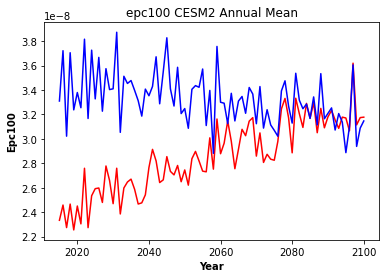

In [28]:
fig, ax = plt.subplots()

ax.plot(time, inc_mean, 'r')
ax.plot(time, dec_mean, 'b')
#ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Annual Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

plt.savefig("output/{}_{}_{}_projection_annual_mean_by_zone.png".format(variable, model, experiment))

plt.show()

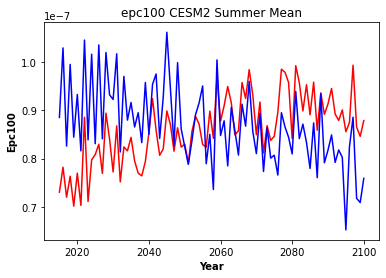

In [29]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_summer, 'r')
ax.plot(time, dec_yearly_summer, 'b')

ax.title.set_text("{} {} Summer Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

plt.savefig("output/{}_{}_{}_projection_summer_mean_by_zone.png".format(variable, model, experiment))

plt.show()

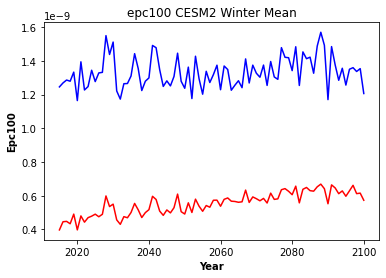

In [30]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
ax.plot(time, dec_yearly_winter, 'b')
ax.plot(time, inc_yearly_winter, 'r')

ax.title.set_text("{} {} Winter Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

plt.savefig("output/{}_{}_{}_projection_winter_mean_by_zone.png".format(variable, model, experiment))

plt.show()

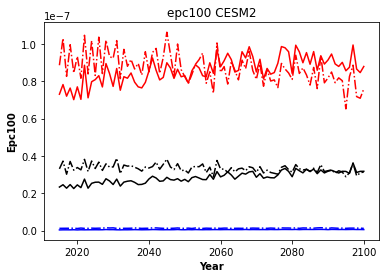

In [33]:
fig, ax = plt.subplots()

ax.plot(time, inc_mean, 'k')
ax.plot(time, inc_yearly_summer, 'r')
ax.plot(time, inc_yearly_winter, 'b')

ax.plot(time, dec_mean, 'k-.')
ax.plot(time, dec_yearly_summer, 'r-.')
ax.plot(time, dec_yearly_winter, 'b-.')

ax.title.set_text("{} {}".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

plt.savefig("output/{}_{}_{}_projection_mean_by_zone.png".format(variable, model, experiment))

plt.show()